# Project: Data Wrangling and Analysis of Twitter-based content <br> (Udacity - case study: WeRateDogs archive)



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#collection">Data Gathering</a></li>
<li><a href="#assessment">Data Assessment</a></li>    
<li><a href="#wrangling">Data Cleaning</a></li>
<li><a href="#master">Creating tidy master Dataset and storing the data</a></li>
<li><a href="#analysis">Analysis and visualizations</a></li>  
<li><a href="#reference">References used</a></li>     
</ul>

<a id='intro'></a>

## Introduction 

This project's objective is to collect WeRateDogs Twitter data and use it to provide insightful and reliable analyses and visualizations. Although the Twitter archive is fantastic, it only includes the most fundamental tweet data. To create stunning and deserving analysis and visualizations, more data needs to be gathered, assessed, and cleaned. This project aims to manipulate WeRateDogs Twitter data to produce engaging and reliable analyses and infographics. Despite being fantastic, the Twitter archive only includes the most fundamental tweet data. For generating spectacular and deserving analysis and visualizations, more data needs to be collected, assessed, and cleaned.

### The necessary python libraries will be loaded to work with



In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import json
%matplotlib inline

<a id='collection'></a>
## Data Gathering

First loading the data from twitter archive

In [2]:
df_twarchive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df_twarchive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [4]:
#This function will be used to download image-predictions.tsv file
import os
import requests

def download_file(url, filename):
    ''' Downloads file from the url and save it as filename '''
    # check if file already exists
    if not os.path.isfile(filename):
        print('Downloading File')
        response = requests.get(url)
        # Check if the response is ok (200)
        if response.status_code == 200:
            # Open file and write the content
            with open(filename, 'wb') as file:
                # A chunk of 128 bytes
                for chunk in response:
                    file.write(chunk)
    else:
        print('File exists')

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
filename = 'image-predictions.tsv'
download_file(url, filename)

File exists


In [6]:
df_image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

In [7]:
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [8]:
#Using tweet-json.txt provided for extra data while waiting for twitter for full access to the API
tweets_list = []
with open('tweet-json.txt', 'r') as file:
   for line in file:
     data = json.loads(line)
     tweets_list.append(data)
df_tweets = pd.DataFrame(tweets_list, columns=['id', 'retweet_count', 'favorite_count'])

In [9]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

The remaining part of the algorithm

In [10]:
# tweet_ids = df_twarchive.tweet_id.values
# len(tweet_ids)
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

Then the next step will be assessing this gathered data

<a id='assessment'></a>
## Data assessment

### Visual assessment

In [11]:
df_twarchive.head(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [12]:
df_image_predictions.head(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [13]:
df_tweets.head(5)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Programmatic assessment

In [14]:
df_twarchive.shape

(2356, 17)

In [15]:
df_twarchive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
df_twarchive['timestamp']

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
                  ...            
2351    2015-11-16 00:24:50 +0000
2352    2015-11-16 00:04:52 +0000
2353    2015-11-15 23:21:54 +0000
2354    2015-11-15 23:05:30 +0000
2355    2015-11-15 22:32:08 +0000
Name: timestamp, Length: 2356, dtype: object

The columns **in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls** have missing values

In [17]:
df_twarchive['tweet_id'].value_counts()

892420643555336193    1
687102708889812993    1
687826841265172480    1
687818504314159109    1
687807801670897665    1
                     ..
775085132600442880    1
774757898236878852    1
774639387460112384    1
774314403806253056    1
666020888022790149    1
Name: tweet_id, Length: 2356, dtype: int64

In [18]:
df_twarchive['in_reply_to_status_id'].value_counts()

6.671522e+17    2
8.862664e+17    1
6.920419e+17    1
6.827884e+17    1
6.842229e+17    1
               ..
8.116272e+17    1
8.131273e+17    1
8.211526e+17    1
8.233264e+17    1
6.670655e+17    1
Name: in_reply_to_status_id, Length: 77, dtype: int64

In [19]:
df_twarchive['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

Source column contains duplicates

In [20]:
df_twarchive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [21]:
df_tweets.shape

(2354, 3)

In [22]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [23]:
df_tweets['favorite_count'].value_counts()

0       179
2706      3
2918      3
610       3
2768      3
       ... 
7493      1
6671      1
4484      1
2872      1
2535      1
Name: favorite_count, Length: 2007, dtype: int64

In [24]:
df_image_predictions.shape

(2075, 12)

In [25]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Data quality issues found in this dataset were:

1. All retweets should be removed from the dataset
2. Missing values in columns doggo	floofer	pupper	puppo are represented as None and should be converted to NaN
3. In the image predictions dataset some p1 values start with small letters while others start with a capital letter, so for convenience all will start with capital letters.
4. In the image predictions dataset some p2 values start with small letters while others start with a capital letter, so for convenience all will start with capital letters.
5. Some dog names start with small letters thus will be converted to capital.
6. Some dog names such as **this** and **unacceptable** do not make any sense thus will be replaced with **No_Name**from the twitter archive dataset
7. Predictions P1, P2 and P3 will be formatted such that spacing will be whitespace rather than '_'
8. Timestamp for the tweetarchive will be converted to datetime format for better manipulation.


## Data tidiness issues found in this dataset were:
1. The columns  'doggo', 'floofer', 'pupper' and 'puppo', are to be merged to dog stages.
2. The columns rating_numerator and rating_denominator can be merged to a single column for better manipulation.

<a id='wrangling'></a>

## Data Cleaning 

**Now that the issues to clean have been assessed, I will enter to the next part which is cleaning these issues**

In [26]:
#First copying the original dataset before entering into the cleaning part
clean_df_image_predictions = df_image_predictions.copy()
clean_df_tw_archive = df_twarchive.copy()
clean_df_tweets = df_tweets.copy()

## Fixing data quality errors 

### Define

1. All retweets should be removed from the dataset. Only original tweets are needed, thus here we can drop all columns related to the retweets

### Code

In [27]:
#This code will help me remain with rows that have NaN retweet id's
clean_df_tw_archive = clean_df_tw_archive[clean_df_tw_archive['retweeted_status_id'].isna()]
clean_df_tw_archive = clean_df_tw_archive[clean_df_tw_archive['retweeted_status_user_id'].isna()]

In [28]:
clean_df_tw_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Test

In [29]:
clean_df_tw_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


### Define

2. Missing values in columns doggo floofer pupper puppo are represented as None and should be converted to NaN. We can replace string values 'None' to NaN which is easier to interpret

### Code

In [30]:
clean_df_tw_archive['doggo'] = clean_df_tw_archive['doggo'].apply(lambda x: x.replace("None", "NaN"))
clean_df_tw_archive['floofer'] = clean_df_tw_archive['floofer'].apply(lambda x: x.replace("None", "NaN"))
clean_df_tw_archive['pupper'] = clean_df_tw_archive['pupper'].apply(lambda x: x.replace("None", "NaN"))
clean_df_tw_archive['puppo'] = clean_df_tw_archive['puppo'].apply(lambda x: x.replace("None", "NaN"))

### Test

In [31]:
clean_df_tw_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN


### Define

3. In the image predictions dataset some p1 values start with small letters while others start with a capital letter, so for convenience all will start with capital letters. Here I will use .str.capitalize() pandas function to achieve this

### Code

In [32]:
clean_df_image_predictions['p1'] = clean_df_image_predictions['p1'].str.capitalize()

### Test

In [33]:
clean_df_image_predictions['p1'].unique()

array(['Welsh_springer_spaniel', 'Redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'Miniature_pinscher',
       'Bernese_mountain_dog', 'Box_turtle', 'Chow', 'Shopping_cart',
       'Miniature_poodle', 'Golden_retriever', 'Gordon_setter',
       'Walker_hound', 'Pug', 'Bloodhound', 'Lhasa', 'English_setter',
       'Hen', 'Desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'Three-toed_sloth', 'Ox', 'Malamute', 'Guinea_pig',
       'Soft-coated_wheaten_terrier', 'Chihuahua',
       'Black-and-tan_coonhound', 'Coho', 'Toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'Llama',
       'Chesapeake_bay_retriever', 'Curly-coated_retriever', 'Dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'Seat_belt',
       'Snail', 'Miniature_schnauzer', 'Airedale', 'Triceratops', 'Swab',
       'Hay', 'Hyena', 'Jigsaw_puzzle', 'West_highland_white_terrier',
       'Toy_poodle', 'Giant_schnauzer', 'Vizsla', 'Vacuum', 'Rottweiler',
       'Siberian_husky', 'T

### Define

4. In the image predictions dataset some p2 values start with small letters while others start with a capital letter, so for convenience all will start with capital letters. Here I will use .str.capitalize() pandas function to achieve this

### Code

In [34]:
clean_df_image_predictions['p2'] = clean_df_image_predictions['p2'].str.capitalize()

### Test

In [35]:
clean_df_image_predictions['p1'].unique()

array(['Welsh_springer_spaniel', 'Redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'Miniature_pinscher',
       'Bernese_mountain_dog', 'Box_turtle', 'Chow', 'Shopping_cart',
       'Miniature_poodle', 'Golden_retriever', 'Gordon_setter',
       'Walker_hound', 'Pug', 'Bloodhound', 'Lhasa', 'English_setter',
       'Hen', 'Desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'Three-toed_sloth', 'Ox', 'Malamute', 'Guinea_pig',
       'Soft-coated_wheaten_terrier', 'Chihuahua',
       'Black-and-tan_coonhound', 'Coho', 'Toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'Llama',
       'Chesapeake_bay_retriever', 'Curly-coated_retriever', 'Dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'Seat_belt',
       'Snail', 'Miniature_schnauzer', 'Airedale', 'Triceratops', 'Swab',
       'Hay', 'Hyena', 'Jigsaw_puzzle', 'West_highland_white_terrier',
       'Toy_poodle', 'Giant_schnauzer', 'Vizsla', 'Vacuum', 'Rottweiler',
       'Siberian_husky', 'T

### Define

5. Some dog names start with small letters thus will be converted to capital. Here we can also use .str.capitalize() pandas function

### Code

In [36]:
clean_df_tw_archive['name'] = clean_df_tw_archive['name'].str.capitalize()

### Test

In [37]:
clean_df_tw_archive['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'A',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
    

### Define

6. Some dog names such as this and unacceptable do not make any sense thus will be replaced with No_Name from the twitter archive dataset

### Code

In [38]:
clean_df_tw_archive['name'].replace('None', 'No name', inplace = True)
clean_df_tw_archive['name'].replace('The', 'No name', inplace = True)
clean_df_tw_archive['name'].replace('Life', 'No name', inplace = True)
clean_df_tw_archive['name'].replace('Light', 'No name', inplace = True)
clean_df_tw_archive['name'].replace('By', 'No name', inplace = True)
clean_df_tw_archive['name'].replace('Actually', 'No name', inplace = True)
clean_df_tw_archive['name'].replace('Infuriating', 'No name', inplace = True)
clean_df_tw_archive['name'].replace('Getting', 'No name', inplace = True)
clean_df_tw_archive['name'].replace('Just', 'No name', inplace = True)
clean_df_tw_archive['name'].replace('This', 'No name', inplace = True)
clean_df_tw_archive['name'].replace('All', 'No name', inplace = True)
clean_df_tw_archive['name'].replace('Very', 'No name', inplace = True)
clean_df_tw_archive['name'].replace('Not', 'No name', inplace = True)
clean_df_tw_archive['name'].replace('Mad', 'No name', inplace = True)
clean_df_tw_archive['name'].replace('My', 'No name', inplace = True)
clean_df_tw_archive['name'].replace('Quite', 'No name', inplace = True)
clean_df_tw_archive['name'].replace('Such', 'No name', inplace = True)
clean_df_tw_archive['name'].replace('An', 'No name', inplace = True)

### Test

In [39]:
clean_df_tw_archive['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'No name',
       'Jax', 'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart',
       'Oliver', 'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'A',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
       'J

### Define

7. Predictions P1, P2 and P3 will be formatted such that spacing will be whitespace rather than '_', We can replace them in all these columns

### Code

In [40]:
clean_df_image_predictions['p1'] = clean_df_image_predictions['p1'].str.replace('_',' ')
clean_df_image_predictions['p2'] = clean_df_image_predictions['p2'].str.replace('_',' ')
clean_df_image_predictions['p3'] = clean_df_image_predictions['p3'].str.replace('_',' ')

### Test

In [41]:
clean_df_image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Define

8. Timestamp for the tweetarchive will be converted to datetime format for better manipulation. It is represented as sting which is hard to manipulate

### Code

In [42]:
clean_df_tw_archive.timestamp = pd.to_datetime(clean_df_tw_archive.timestamp)
#Also removing timezone below for much better manipulation
clean_df_tw_archive['timestamp'] = pd.to_datetime(clean_df_tw_archive.timestamp).dt.tz_localize(None)

### Test

In [43]:
clean_df_tw_archive['timestamp'].head(5)

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

## Fixing data tidiness errors:

### Define

1. The columns 'doggo', 'floofer', 'pupper' and 'puppo', are to be merged to dog stages.

### Code

In [44]:
clean_df_tw_archive['Stages'] = clean_df_tw_archive[clean_df_tw_archive.columns[14:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
#Then we will drop the columns
clean_df_tw_archive.drop('doggo', axis=1, inplace=True)
clean_df_tw_archive.drop('floofer', axis=1, inplace=True)
clean_df_tw_archive.drop('pupper', axis=1, inplace=True)
clean_df_tw_archive.drop('puppo', axis=1, inplace=True)

### Test

In [45]:
clean_df_tw_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,Stages
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,"NaN,NaN,NaN"
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,"NaN,NaN,NaN"
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,"NaN,NaN,NaN"
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,"NaN,NaN,NaN"
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,"NaN,NaN,NaN"


### Define

2. The columns rating_numerator and rating_denominator can be merged to a single column for better visualization for it.

### Code

In [46]:
clean_df_tw_archive['Rating'] = clean_df_tw_archive['rating_numerator']/clean_df_tw_archive['rating_denominator']
clean_df_tw_archive.drop('rating_numerator', axis=1, inplace=True)
clean_df_tw_archive.drop('rating_denominator', axis=1, inplace=True)

### Test

In [47]:
clean_df_tw_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,Stages,Rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,Phineas,"NaN,NaN,NaN",1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,Tilly,"NaN,NaN,NaN",1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,Archie,"NaN,NaN,NaN",1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,Darla,"NaN,NaN,NaN",1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,Franklin,"NaN,NaN,NaN",1.2


<a id='master'></a>

## Creating tidy master dataset and storing data

In [48]:
clean_df_tweets = clean_df_tweets.rename(columns={'id': 'tweet_id'})

In [49]:
master_df = pd.merge(clean_df_tw_archive, clean_df_image_predictions, on = 'tweet_id', how = 'inner' )

In [50]:
master_df = pd.merge(master_df, clean_df_tweets, on = 'tweet_id', how = 'inner' )

In [51]:
master_df 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,Bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,Malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True,9774,41048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,666049248165822465,NaN,NaN,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,41,111
1990,666044226329800704,NaN,NaN,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,0.408143,True,Redbone,0.360687,True,miniature pinscher,0.222752,True,147,311
1991,666033412701032449,NaN,NaN,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,0.596461,True,Malinois,0.138584,True,bloodhound,0.116197,True,47,128
1992,666029285002620928,NaN,NaN,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True,48,132


In [52]:
master_df.to_csv("twitter_archive_master.csv")

<a id='analysis'></a>

## Analysis and Visualizations

## Analysis 1

In [53]:
#I will try to get hours from datetime dataset created
clean_df_tw_archive['hour'] = clean_df_tw_archive['timestamp'].dt.hour

In [54]:
clean_df_tw_archive['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [55]:
#Also for better visualization I will change source link to short text discription
clean_df_tw_archive['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iphone', inplace = True)
clean_df_tw_archive['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client', inplace = True)
clean_df_tw_archive['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Make a Scene', inplace = True)
clean_df_tw_archive['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck', inplace = True)


In [56]:
clean_df_tw_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,Stages,Rating,hour
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,Phineas,"NaN,NaN,NaN",1.3,16
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,Tilly,"NaN,NaN,NaN",1.3,0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,Archie,"NaN,NaN,NaN",1.2,0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,Darla,"NaN,NaN,NaN",1.3,15
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,Franklin,"NaN,NaN,NaN",1.2,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50,Twitter for iphone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,No name,"NaN,NaN,NaN",0.5,0
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52,Twitter for iphone,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,A,"NaN,NaN,NaN",0.6,0
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54,Twitter for iphone,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,A,"NaN,NaN,NaN",0.9,23
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30,Twitter for iphone,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,A,"NaN,NaN,NaN",0.7,23


In [57]:
#Making a new dataset to simplify plotting
plotting = clean_df_tw_archive[['source','hour']].copy()
plotting


,source,hour
0,Twitter for iphone,16
1,Twitter for iphone,0
2,Twitter for iphone,0
3,Twitter for iphone,15
4,Twitter for iphone,16
...,...,...
2351,Twitter for iphone,0
2352,Twitter for iphone,0
2353,Twitter for iphone,23
2354,Twitter for iphone,23


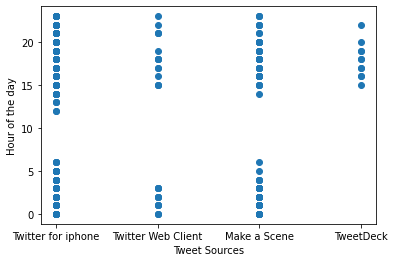

In [58]:
plt.scatter(plotting['source'], plotting['hour'])
plt.xlabel("Tweet Sources")
plt.ylabel("Hour of the day")
plt.show() 

From the scatter plot above we can draw some straightforward conclusions:

1. Many of the sources do not tweet between 0600 hours and 1200 hours. 
2. Most users use iphones to tweet.
3. Tweetdeck users mostly tweet later in the day before midnight and during afternoon hours.

### Analysis 2

Here I will find out the tweet which had the most favorites(People liked the most)

In [59]:
#This code will return the values corresponding with highest favorite count
clean_df_tweets.loc[clean_df_tweets['favorite_count'].idxmax()]

tweet_id          822872901745569793
retweet_count                  48265
favorite_count                132810
Name: 412, dtype: int64

In [60]:
tweet1 = clean_df_tw_archive[(clean_df_tw_archive.tweet_id == 822872901745569793)]

In [61]:
tweet1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,Stages,Rating,hour
413,822872901745569793,NaN,NaN,2017-01-21 18:26:02,Twitter for iphone,Here's a super supportive puppo participating ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822872901...,No name,"NaN,NaN,puppo",1.3,18


In [62]:
tweet1['expanded_urls']

413    https://twitter.com/dog_rates/status/822872901...
Name: expanded_urls, dtype: object

In [63]:
tweet2 = clean_df_image_predictions[(clean_df_image_predictions.tweet_id == 822872901745569793)]

In [64]:
tweet2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1744,822872901745569793,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland terrier,0.196015,True,Labrador retriever,0.160329,True,Irish terrier,0.069126,True


In [65]:
tweet2['jpg_url']

1744    https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
Name: jpg_url, dtype: object

Thus from the wrangling above we can see that the tweet that had the tweet id **822872901745569793** was the one that was liked the most and its link was https://twitter.com/dog_rates/status/822872901... and the dog had no name   

Also from the image prediction dataset here is the image of that dog that had most favorites: 
<br>
<img src="https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg" style="width:50%">
<br>

## Analysis 3

Here I will try to find which dog breed was best predicted by the neuronetwork in the first prediction p1

In [66]:
#First I will remove any unwanted data
best_predict =  clean_df_image_predictions[(clean_df_image_predictions.p1_dog==True)]

In [67]:
best_predict

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border collie,0.199287,True,ice lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake bay retriever,0.425595,True,Irish terrier,0.116317,True,Indian elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,kelpie,0.031379,True


In [68]:
#Here I will find the highest value relating to p1_conf which indicates highest predicting probability
best_predict.loc[best_predict['p1_conf'].idxmax()]

tweet_id                                 668636665813057536
jpg_url     https://pbs.twimg.com/media/CUd5gBGWwAA0IVA.jpg
img_num                                                   1
p1                                                 Komondor
p1_conf                                            0.999956
p1_dog                                                 True
p2                                                    Llama
p2_conf                                            0.000043
p2_dog                                                False
p3                                                      ram
p3_conf                                                 0.0
p3_dog                                                False
Name: 149, dtype: object

Thus as it can be clearly seen above, **Komondor** dog breed was most accurately predicted by prediction1 

Here is the image of the best predicted image by the neuralnetwork in the first prediction:
<br>
<img src="https://pbs.twimg.com/media/CUd5gBGWwAA0IVA.jpg" style="width:50%">
<br>

<a id='reference'></a>
## References used

https://stackoverflow.com/questions/45978295/saving-a-downloaded-csv-file-using-python

https://stackoverflow.com/questions/28986489/how-to-replace-text-in-a-string-column-of-a-pandas-dataframe

https://datatofish.com/uppercase-pandas-dataframe/

https://stackoverflow.com/questions/36619631/how-to-divide-two-columns-element-wise-in-a-pandas-dataframe

https://stackoverflow.com/questions/33098383/merge-multiple-column-values-into-one-column-in-python-pandas

https://stackoverflow.com/questions/62917882/convert-datetime64ns-utc-pandas-column-to-datetime

https://stackoverflow.com/questions/15741759/find-maximum-value-of-a-column-and-return-the-corresponding-row-values-using-pan